In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('dummy.csv')

In [3]:
df.shape

(3000, 2)

In [4]:
df.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [5]:
# Getting the values for plotting

f1 = df['V1'].values
f2 = df['V2'].values

In [6]:
f1

array([ 2.072345, 17.93671 ,  1.083576, ..., 64.46532 , 90.72282 ,
       64.87976 ])

In [7]:
f2

array([ -3.241693,  15.78481 ,   7.319176, ..., -10.50136 , -12.25584 ,
       -24.87731 ])

In [8]:
x = np.array(list(zip(f1, f2)))
x

array([[  2.072345,  -3.241693],
       [ 17.93671 ,  15.78481 ],
       [  1.083576,   7.319176],
       ...,
       [ 64.46532 , -10.50136 ],
       [ 90.72282 , -12.25584 ],
       [ 64.87976 , -24.87731 ]])

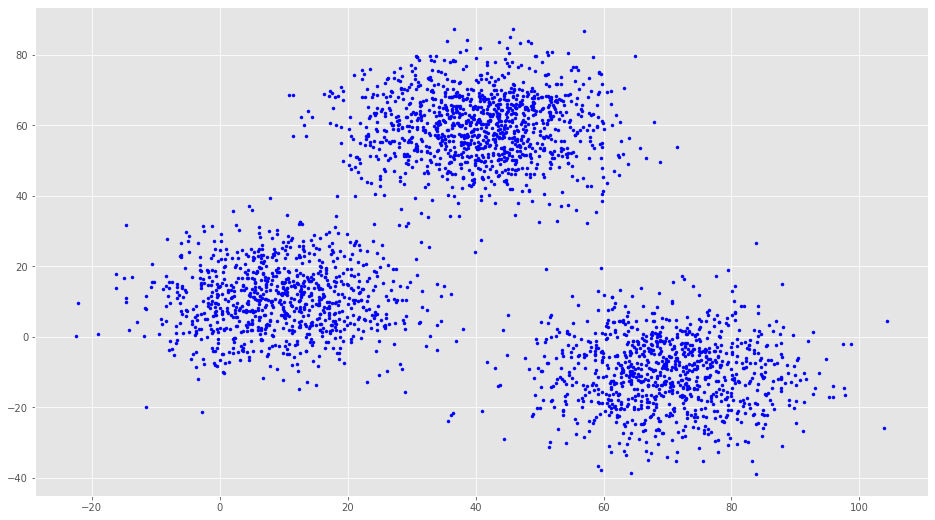

In [9]:
# Scatter plot
# s --> Used to set the thickness of the dots in the plot

plt.scatter(f1, f2, c = 'blue', s = 9)

In [15]:
# Checking for optimal number of clusters

from sklearn.cluster import KMeans
cluster_range = range(1, 15)
cluster_error = []
for i in cluster_range:
    
    # 'n_init' is used to set number of times the centroid will be changed
    cluster = KMeans(i, n_init = 5)
    cluster.fit(x)
    
    # Getting the cluster labels
    labels = cluster.labels_
    
    # Getting the centroids
    centroids = cluster.cluster_centers_
    
    # Getting the error
    cluster_error.append(cluster.inertia_)
    
# Combining cluster_error and cluster_range in same dataframe
clus_df = pd.DataFrame({'Number_of_clusters':cluster_range, 'Cluster_error':cluster_error})
clus_df[0:15]    

,Number_of_clusters,Cluster_error
0,1,5.030433e+06
1,2,2.309985e+06
2,3,6.116059e+05
3,4,5.363004e+05
4,5,4.692923e+05
5,6,4.081899e+05
6,7,3.588001e+05
7,8,3.135613e+05
8,9,2.734198e+05
9,10,2.534963e+05


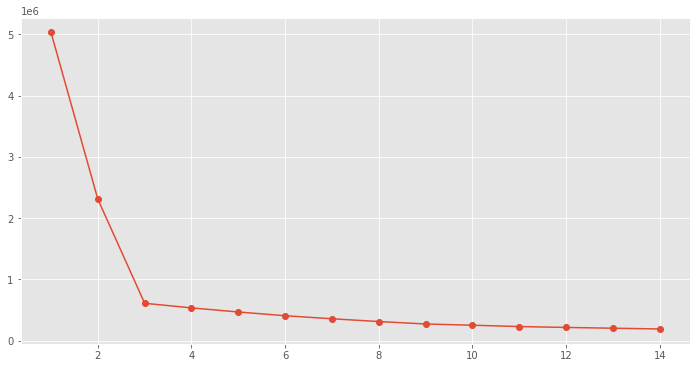

In [20]:
# Elbow plot for 'Cluster error' and 'Number of clusters' to decide the number of clusters to be taken

plt.figure(figsize = (12, 6))
plt.plot(clus_df.Number_of_clusters, clus_df.Cluster_error, marker = 'o')

From the graph, there is a sharp change of slope at 3, hence, we will take 3 clusters.

In [21]:
# Making the model

km = KMeans(n_clusters = 3)
km = km.fit(x)

# Getting the cluster labels
pred = km.predict(x)

# Getting the centroids
center = km.cluster_centers_

print ('Centroid values')
print (center)

Centroid values
[[  9.4780459   10.686052  ]
 [ 40.68362784  59.71589274]
 [ 69.92418447 -10.11964119]]


In [22]:
colname = ['col1', 'col2']
x_df = pd.DataFrame(x, columns = colname)
x_df['Predicted group'] = pred

In [23]:
x_df.head(10)

,col1,col2,Predicted group
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0
5,24.169930,32.024780,0
6,21.665780,4.892855,0
7,4.693684,12.342170,0
8,19.211910,-1.121366,0
9,4.230391,-4.441536,0


In [24]:
x_df.tail(30)

,col1,col2,Predicted group
2970,84.63376,-10.654310,2
2971,59.70858,-7.022610,2
2972,66.62059,0.278247,2
2973,79.44290,-20.880200,2
2974,59.14149,-3.268589,2
2975,62.93142,-9.672550,2
2976,76.28171,6.197267,2
2977,81.78130,-17.894410,2
2978,49.64519,-20.291110,2
2979,58.37999,-12.982000,2


In [25]:
x_df['Predicted group'].value_counts()

1    1149
2     952
0     899
Name: Predicted group, dtype: int64

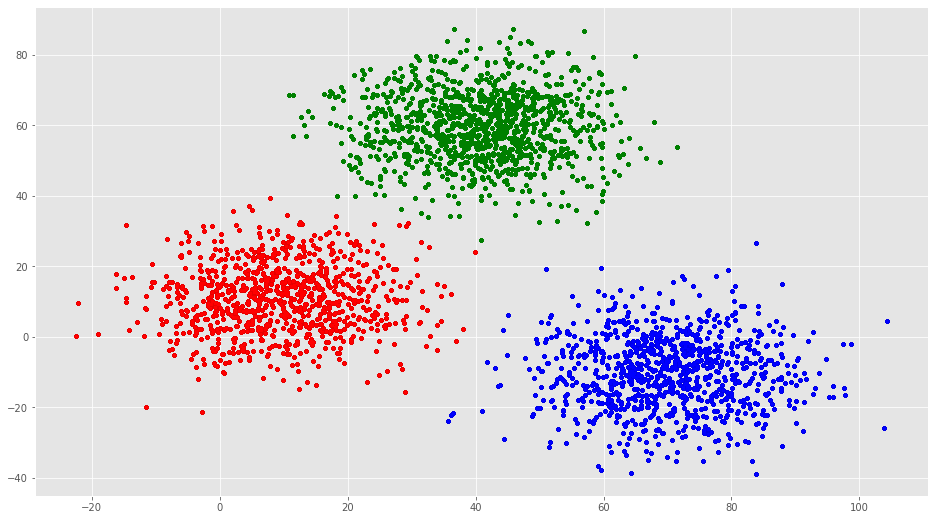

In [27]:
# Clusters on scatter plot

color = ['r', 'g', 'b', 'c', 'y', 'm']
fig, ax = plt.subplots()
c = np.array([3, 3])
for j in pred:
    point = np.array(x_df.loc[x_df['Predicted group'] == j])
    ax.scatter(point[:, 0], point[:, 1], s = 7, c = color[j])

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'col1'}, xlabel='[Predicted group]'>,
        <AxesSubplot:title={'center':'col2'}, xlabel='[Predicted group]'>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

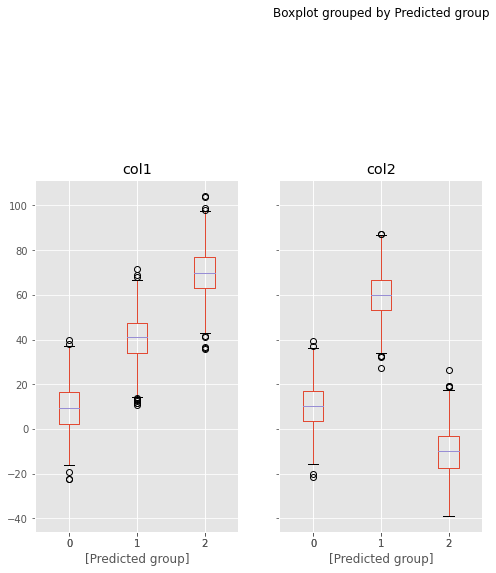

In [28]:
# Box plot

import matplotlib.pylab as plt
x_df.boxplot(by = 'Predicted group', layout = (4, 3), figsize = (12, 30))